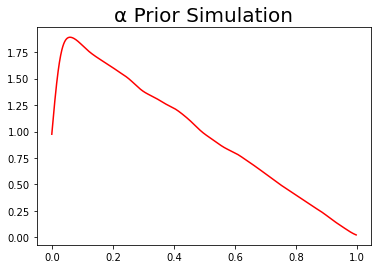

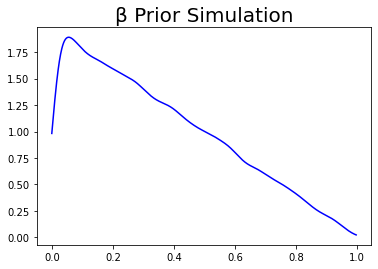

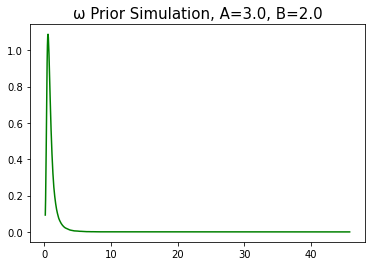

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

A_PRIOR = 3.0
B_PRIOR = 2.0

OMEGA_PATH = "../data/omega_prior.txt"
ALPHA_PATH = "../data/alpha_prior.txt"
BETA_PATH = "../data/beta_prior.txt"

def sample_alpha_beta_prior():
    
    # draw until find a valid result
    while True:
        # draw from uniform, [0.0, 1.0)
        alpha_draw = np.random.uniform()
        beta_draw = np.random.uniform()
        
        if beta_draw > 0.0 and alpha_draw > 0.0 and alpha_draw + beta_draw < 1.0:
            return alpha_draw, beta_draw

        
def sample_omega_prior(a, b):
    
    # draw until find a valid result
    while True:
        omega_draw = stats.invgamma.rvs(a, scale=b)
        
        if omega_draw > 0:
            return omega_draw
    return



def prior_simulator(num_iters, omega_a_, omega_b_):
    
    alpha_sim = np.zeros(num_iters)
    beta_sim = np.zeros(num_iters)
    omega_sim = np.zeros(num_iters)
    
    for i in range(num_iters):
        
        alpha, beta = sample_alpha_beta_prior()
        omega = sample_omega_prior(omega_a_, omega_b_)
        
        alpha_sim[i] = alpha
        beta_sim[i] = beta
        omega_sim[i] = omega
        
    return alpha_sim, beta_sim, omega_sim
        
    
a, b, o = prior_simulator(100000, A_PRIOR, B_PRIOR)

# write to file
np.savetxt(OMEGA_PATH, o)
np.savetxt(ALPHA_PATH, a)
np.savetxt(BETA_PATH, b)

# evaluate kernel density estimator
kde_a = stats.gaussian_kde(a)  
x_a = np.linspace(np.min(a), np.max(a), 1000)
p_a = kde_a(x_a)
plt.plot(x_a, p_a, color='r')
plt.title("α Prior Simulation", fontsize=20)
plt.show()

kde_b = stats.gaussian_kde(b)   
x_b = np.linspace(np.min(b), np.max(b), 1000)
p_b = kde_b(x_b)
plt.plot(x_b, p_b, color='b')
plt.title("β Prior Simulation", fontsize=20)
plt.show()

kde_o = stats.gaussian_kde(o) 
x_o = np.linspace(np.min(o), np.max(o), 1000)
p_o = kde_o(x_o)
plt.plot(x_o, p_o, color='g')
plt.title("ω Prior Simulation, A=3.0, B=2.0", fontsize=15)
plt.show()
